# Analysis
Below is data concerning the 2023-2024 seasons. There's a moderate ($r$ = -0.4 to -0.5) negative correlation between (stat-xstat) and how players perform the following season relative to their previous season. The p-values are also very low (< 0.00001), indicating that the correlation is statistically significant. It is important to note that $r^{2}$ for the graphs only range from 0.19 to 0.24, meaning that only 19-24% of variance in the change in OPS is explained by the difference in actual and expected statistics.


In [109]:
import pandas as pd
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('../out.csv')

In [110]:
rwoba, pwoba = stats.pearsonr(df['wobadiff (2023)'], df['ops_change 2023-2024'])
rslg, pslg = stats.pearsonr(df['xslgdiff (2023)'], df['ops_change 2023-2024'])
rba, pba = stats.pearsonr(df['xbadiff (2023)'], df['ops_change 2023-2024'])

data = {
    '%ΔOPS vs wOBA-xwOBA': [rwoba, rwoba**2, pwoba],
    '%ΔOPS vs SLG - xSLG': [rslg, rslg**2, pslg], 
    '%ΔOPS vs BA - xBA': [rba, rba**2, pba]
}

values_df = pd.DataFrame.from_dict(data, orient='index', columns=['r', 'r^2', 'p'])
values_df.rename_axis("graph", inplace=True)
display(values_df)

,r,r^2,p
graph,,,
%ΔOPS vs wOBA-xwOBA,-0.493158,0.243205,1.207382e-07
%ΔOPS vs SLG - xSLG,-0.435986,0.190083,4.159457e-06
%ΔOPS vs BA - xBA,-0.494272,0.244305,1.119548e-07


(Text(0.5, 1.0, 'BA Difference vs OPS Change'),
 Text(0.5, 0, 'BA - xBA'),
 Text(0, 0.5, '% Change OPS'))

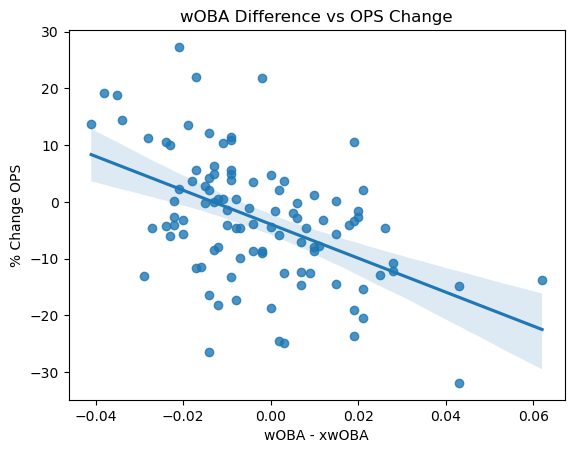

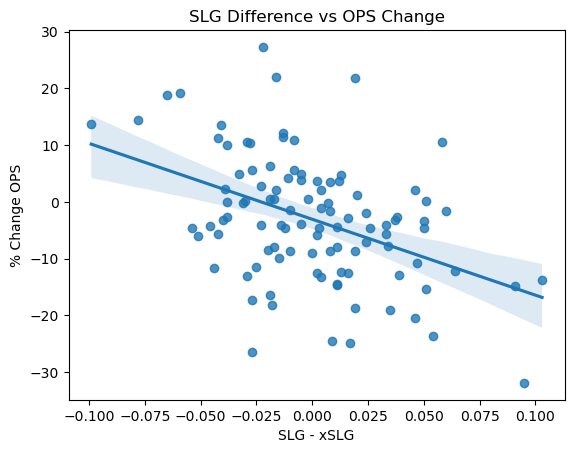

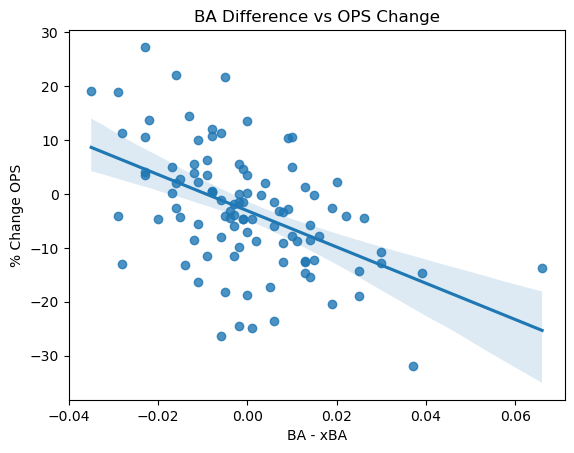

In [111]:
plt.figure()
sb.regplot(x = 'wobadiff (2023)', y = 'ops_change 2023-2024', data = df)
plt.title('wOBA Difference vs OPS Change'), plt.xlabel('wOBA - xwOBA'), plt.ylabel('% Change OPS')

plt.figure()
sb.regplot(x = 'xslgdiff (2023)', y = 'ops_change 2023-2024', data = df)
plt.title('SLG Difference vs OPS Change'), plt.xlabel('SLG - xSLG'), plt.ylabel('% Change OPS')

plt.figure()
sb.regplot(x = 'xbadiff (2023)', y = 'ops_change 2023-2024', data = df)
plt.title('BA Difference vs OPS Change'), plt.xlabel('BA - xBA'), plt.ylabel('% Change OPS')
